# Biclustering 

Biclustering using sklearn

In [1]:
import gc
import pandas as pd
import glob
import sklearn
import numpy as np

In [2]:
diFiles=glob.glob("../data/Di/*")
diFiles

['../data/Di/Jnk.csv',
 '../data/Di/IRF4.csv',
 '../data/Di/LEF1.csv',
 '../data/Di/Ikk2.csv',
 '../data/Di/CTNNB1.csv',
 '../data/Di/Erk.csv',
 '../data/Di/MYC.csv']

In [3]:
trainIndexFiles=glob.glob("../Train/*")
trainIndexFiles

['../Train/LEF1.index.csv',
 '../Train/MYC.index.csv',
 '../Train/IRF4.index.csv',
 '../Train/Jnk.index.csv',
 '../Train/Ikk2.index.csv',
 '../Train/Erk.index.csv',
 '../Train/CTNNB1.index.csv']

In [4]:
trainIndexFiles=glob.glob("../Train/*")
frames = list()
for f in trainIndexFiles:
    indices = pd.read_csv(f,sep=";")
    indexList=list(indices['0'])
    protein = f.split("/")[-1].split(".")[0]
    fpath = '../data/Di/'+f.split("/")[-1].split(".")[0]+".csv"
    diRead = pd.read_csv(fpath,sep=";")
    diPartialTrain=diRead[diRead.columns[5:]].loc[indexList].copy()
    diPartialTrain.insert(0,column='Protein',value =protein )
    del diRead
    gc.collect()
    frames.append(diPartialTrain)
diTrain =  pd.concat(frames)

In [5]:
diTrain.head()

,Protein,X0min_neg_effect-X0min_neg_cause,X15min_effect-X0min_neg_cause,X15min_effect-X15min_cause,X30min_effect-X0min_neg_cause,X30min_effect-X15min_cause,X30min_effect-X30min_cause,X90min_effect-X0min_neg_cause,X90min_effect-X15min_cause,X90min_effect-X30min_cause,...,X240min_effect-X240min_cause,X360min_effect-X0min_neg_cause,X360min_effect-X15min_cause,X360min_effect-X30min_cause,X360min_effect-X90min_cause,X360min_effect-X120min_cause,X360min_effect-X180min_cause,X360min_effect-X210min_cause,X360min_effect-X240min_cause,X360min_effect-X360min_cause
1530,LEF1,-1.398215,-1.332073,-1.176495,-1.152913,-0.997335,-1.138456,-0.748848,-0.593270,-0.734391,...,2.750291,-0.626720,-0.471142,-0.612263,-0.798977,0.539404,1.340642,1.469409,1.965642,1.504612
1531,LEF1,-1.398215,-2.044245,-2.118504,-1.532107,-1.606366,-1.470422,-1.569035,-1.643294,-1.507350,...,0.370043,-1.108882,-1.183141,-1.047197,-0.874397,-1.075918,-0.703188,-0.427842,-0.257982,0.510709
1532,LEF1,-1.788833,-2.585672,-2.277672,-1.168975,-0.860975,-1.271061,0.322233,0.630234,0.220148,...,1.514755,-0.227687,0.080314,-0.329772,0.364790,0.983367,0.419474,2.833032,1.480500,3.645275
1533,LEF1,-1.788833,-1.823722,-1.514011,-1.545921,-1.236210,-1.757871,-0.847480,-0.537768,-1.059429,...,0.379215,-3.095851,-2.786140,-3.307800,-3.017836,-3.030779,-2.279847,-2.823244,-2.188745,-2.846625
1535,LEF1,-1.375053,-1.252870,-1.363479,-0.796131,-0.906741,-1.598657,-0.169129,-0.279739,-0.971655,...,1.312185,0.099997,-0.010613,-0.702529,-0.537396,-0.619269,-0.279518,-0.051200,0.444093,-0.952516


In [6]:
lstn_clusters=range(2,30)

In [7]:
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score
from sklearn.datasets import samples_generator as sg

In [8]:
spectralCC = SpectralCoclustering(n_clusters=5, random_state=0)
spectralCC.fit(diTrain[diTrain.columns[1:]])

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=5,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

In [9]:
len(spectralCC.biclusters_)

2

In [10]:
len(spectralCC.biclusters_[1][1])

45

In [11]:
%matplotlib inline

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
temp = diTrain[diTrain.columns[1:]]
data=temp.iloc[np.argsort(spectralCC.row_labels_)]

In [14]:
data
data = data.iloc[:, np.argsort(spectralCC.column_labels_)]

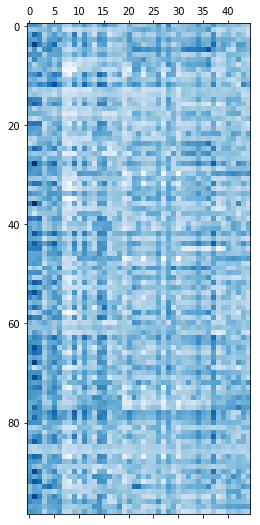

In [15]:
plt.matshow(data.iloc[1:100], cmap=plt.cm.Blues)